In [2]:
# Helpful packages for working with images and factorizations
# using Pkg; Pkg.add("Images")
# using Pkg; Pkg.add("ImageMagick") # And this allows us to load JPEG-encoded images
using Images, LinearAlgebra, Interact

### Using an SVD to compress an image
We take a matrix $A$ and factorize it so that

$$A = USV^T$$

where matrices $U$ and $V$ are orthogonal and hold our singular vectors. Matrix $S$ is  diagonal and stores our singular values in decreasing order from top/left to bottom/right.

In [3]:
strang = download("https://ocw.mit.edu/faculty/gilbert-strang/strang-blue.jpg","strang.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38442  100 38442    0     0   162k      0 --:--:-- --:--:-- --:--:--  161k


"strang.jpg"

In [4]:
cb = download("https://i.barkpost.com/wp-content/uploads/2015/01/corgi2.jpg?q=70&fit=crop&crop=entropy&w=808&h=500","cb.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82275  100 82275    0     0  1147k      0 --:--:-- --:--:-- --:--:-- 1164k


"cb.jpg"

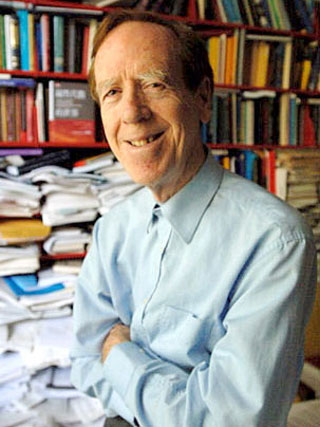

In [5]:
s = load(strang)

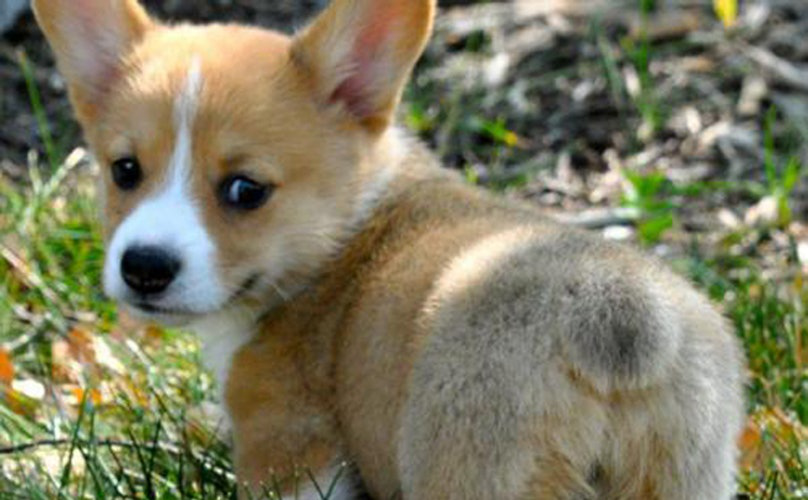

In [6]:
img = load(cb)

In [7]:
channels = Float64.(channelview(img));

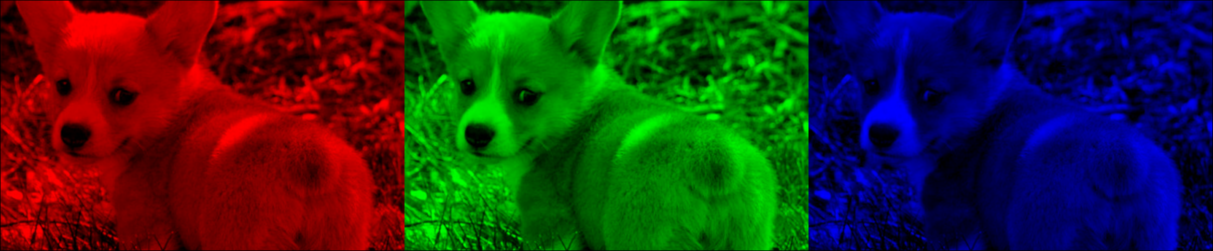

In [8]:
[ colorview(RGB, channels.*[1; 0; 0]) colorview(RGB, channels.*[0; 1; 0]) colorview(RGB, channels.*[0; 0; 1])]

In [9]:
function rank_approx(M, k)
    U, s, V = svd(M)    
    M = U[:, 1:k] * Diagonal(s[1:k]) * V[:, 1:k]'    
    M = min.(max.(M, 0.0), 1.) # Clip to between 0 and 1
end

rank_approx (generic function with 1 method)

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
50), Observable{Int64} with 2 listeners. Value:
50, Scope("knockout-component-d65ddd8b-5ae2-495a-9537-f829e191a6b9", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/alanedelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/alanedelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/alanedelman/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/alanedelman/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/alanedelman/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-d65ddd8b-5ae2-495a-9537-f829e191a6b9\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-d65ddd8b-5ae2-495a-9537-f829e191a6b9\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n       
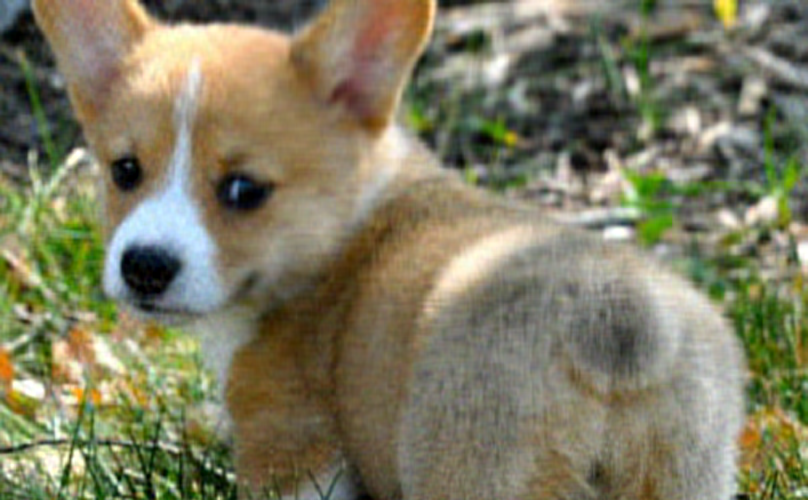
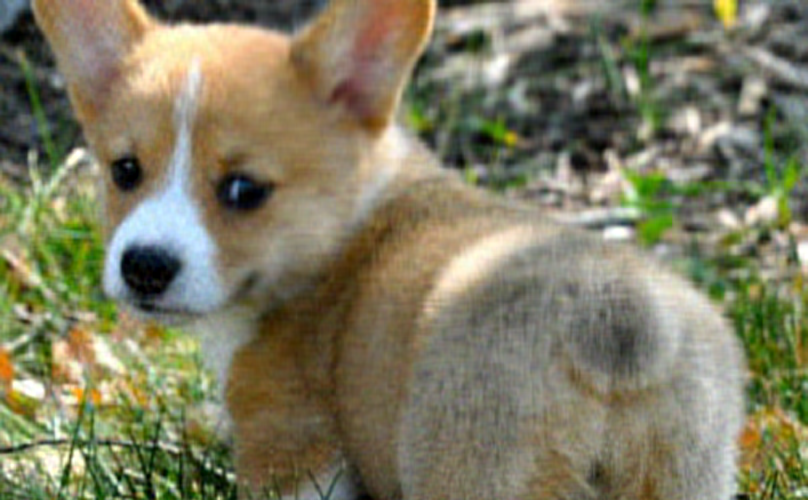

In [10]:
n = 100
@manipulate for k in 1:n
    colorview(  RGB, 
                rank_approx(channels[1,:,:], k),
                rank_approx(channels[2,:,:], k),
                rank_approx(channels[3,:,:], k)
    )
end

In [ ]:
n = 100
@manipulate for r in 1:n, g in 1:n, b in 1:n
    colorview(  RGB, 
                rank_approx(channels[1,:,:], r),
                rank_approx(channels[2,:,:], g),
                rank_approx(channels[3,:,:], b)
    )
end